In [1]:
!pip install pandas numpy scikit-learn matplotlib --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
url = "https://raw.githubusercontent.com/mounaargdal/ad-relevance-scoring/main/data/sample_ads.csv"
df = pd.read_csv(url)
df.head()

,query,ad_title,ad_text,clicked,label_relevant
0,buy running shoes,Lightweight Running Shoes,Shop the latest lightweight running shoes with...,1,1
1,buy running shoes,Luxury Leather Heels,Premium leather heels for special occasions.,0,0
2,cheap hotel paris,Budget Hotel in Paris,Book a budget-friendly hotel room in central P...,1,1
3,cheap hotel paris,Flight Deals to New York,Save on flights to New York this summer.,0,0
4,learn python,Online Python Course,Interactive Python course with real projects.,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   query           8 non-null      object
 1   ad_title        8 non-null      object
 2   ad_text         8 non-null      object
 3   clicked         8 non-null      int64 
 4   label_relevant  8 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 452.0+ bytes


In [4]:
df["label_relevant"].value_counts()

,count
label_relevant,
1,4
0,4


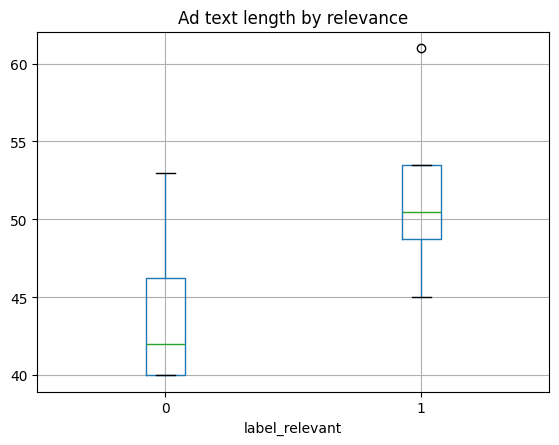

In [5]:
df["text_length"] = df["ad_text"].str.len()

df.boxplot(column="text_length", by="label_relevant")
plt.title("Ad text length by relevance")
plt.suptitle("")
plt.show()

In [7]:
df["full_text"] = df["query"] + " " + df["ad_title"] + " " + df["ad_text"]

X_text = df["full_text"]
y = df["label_relevant"]

X_train, X_test, y_train, y_test = train_test_split(
    X_text, y, test_size=0.3, random_state=42, stratify=y
)

len(X_train), len(X_test)

(5, 3)

In [8]:
vectorizer = CountVectorizer(ngram_range=(1, 2), min_df=1)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [9]:
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cm

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



array([[0, 2],
       [1, 0]])

In [11]:
sample = X_test.sample(3, random_state=0)   # test set has only 3 samples
sample_vec = vectorizer.transform(sample)
preds = model.predict(sample_vec)

for text, pred in zip(sample, preds):
    print("TEXT:", text)
    print("PREDICTED RELEVANT:", bool(pred))
    print("-" * 60)

TEXT: learn python Online Python Course Interactive Python course with real projects.
PREDICTED RELEVANT: False
------------------------------------------------------------
TEXT: best smartphone 2024 Used Car Marketplace Find used cars near you at great prices.
PREDICTED RELEVANT: True
------------------------------------------------------------
TEXT: buy running shoes Luxury Leather Heels Premium leather heels for special occasions.
PREDICTED RELEVANT: True
------------------------------------------------------------
